### Titanic Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
# set the color palette
sns.set_palette(sns.color_palette("husl"))
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
import load_transform as lt
from feature_exploration import feature_exploration as fe
from feature_exploration import tree
%reload_ext autoreload
%autoreload 2
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from ML_analysis import ML_part2 as ML

In [13]:
df = lt.load_explore('train.csv')

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [14]:
df['GenderBoolean'] = df['Sex'].apply(lt.gender_boolean)

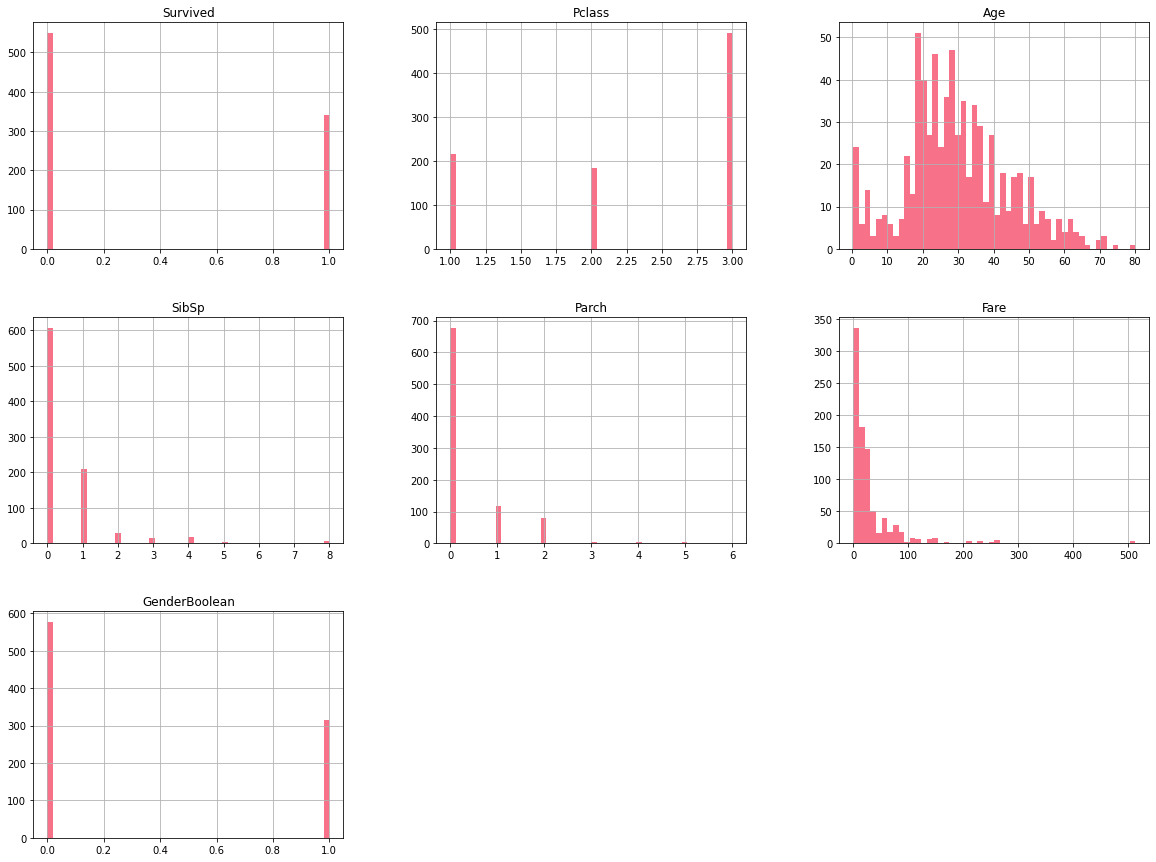

In [4]:
fe.show_feature_hist(df)

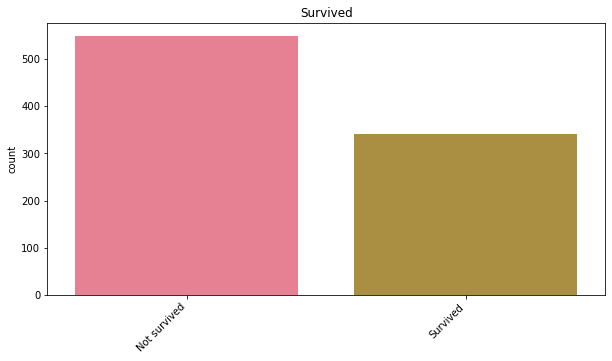

In [5]:
fe.plot_survived(df, df['Survived'])

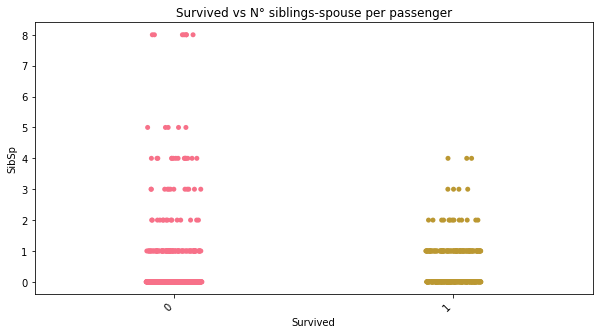

In [6]:
fe.plot_survived_vs_sib_spouse(df, df['Survived'], df['SibSp'])

In [ ]:
corr=fe.get_correlation(df, 'Survived')
corr

In [ ]:
one_hot_array = fe.get_1hot_array(df[['Embarked']])
one_hot_array

In [7]:
clean_df = lt.create_clean_df(df, ['Survived', 'Pclass', 'Age', 'SibSp', 'GenderBoolean'])
clean_df

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [ ]:
tree.model_decision_tree(clean_df)

In [15]:
ML.split_data(df)

(array([[3, 'Braund, Mr. Owen Harris', 'male', ..., nan, 'S', 0],
        [1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
         'female', ..., 'C85', 'C', 1],
        [3, 'Heikkinen, Miss. Laina', 'female', ..., nan, 'S', 1],
        ...,
        [3, 'Johnston, Miss. Catherine Helen "Carrie"', 'female', ...,
         nan, 'S', 1],
        [1, 'Behr, Mr. Karl Howell', 'male', ..., 'C148', 'C', 0],
        [3, 'Dooley, Mr. Patrick', 'male', ..., nan, 'Q', 0]], dtype=object),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
%reload_ext autoreload
variable_test= ML.my_train_test_split(df, 0.3)

In [25]:
variable_test[0]

array([[1, 'Hassab, Mr. Hammad', 'male', ..., 'D49', 'C', 0],
       [1, 'Calderhead, Mr. Edward Pennington', 'male', ..., 'E24', 'S',
        0],
       [1, 'Chambers, Mr. Norman Campbell', 'male', ..., 'E8', 'S', 0],
       ...,
       [3, 'Asplund, Master. Clarence Gustaf Hugo', 'male', ..., nan,
        'S', 0],
       [3, "O'Connell, Mr. Patrick D", 'male', ..., nan, 'Q', 0],
       [1, 'Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)', 'female',
        ..., 'C126', 'S', 1]], dtype=object)

In [26]:
variable_test[1]

array([[2, 'Bracken, Mr. James H', 'male', ..., nan, 'S', 0],
       [1, 'Molson, Mr. Harry Markland', 'male', ..., 'C30', 'S', 0],
       [3, 'Pickard, Mr. Berk (Berk Trembisky)', 'male', ..., 'E10', 'S',
        0],
       ...,
       [3, 'Andersson, Master. Sigvard Harald Elias', 'male', ..., nan,
        'S', 0],
       [3, 'Lemberopolous, Mr. Peter L', 'male', ..., nan, 'C', 0],
       [1, 'Allison, Miss. Helen Loraine', 'female', ..., 'C22 C26', 'S',
        1]], dtype=object)

In [27]:
variable_test[2]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [ ]:
%reload_ext autoreload
ML.predict_kNN(df, 1, 15, 5)